# Santos lyrics analyzer

Accordion(children=(Tab(children=(VBox(children=(Text(value='Eminem'), Button(description='Get discography', s…

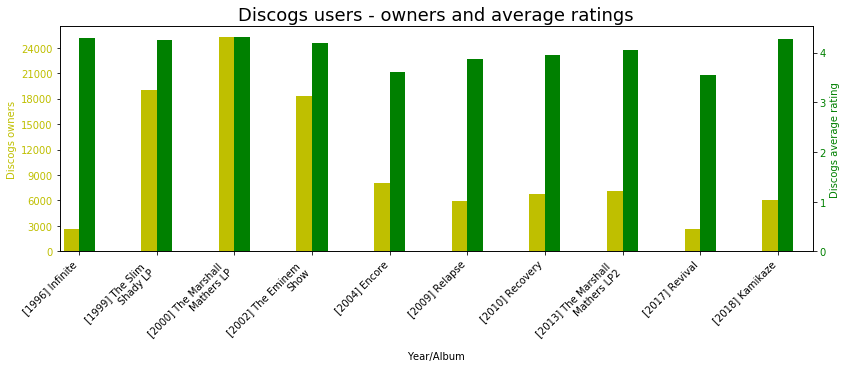

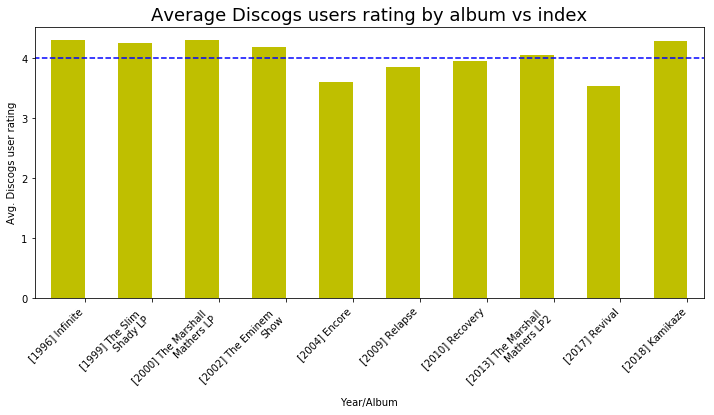

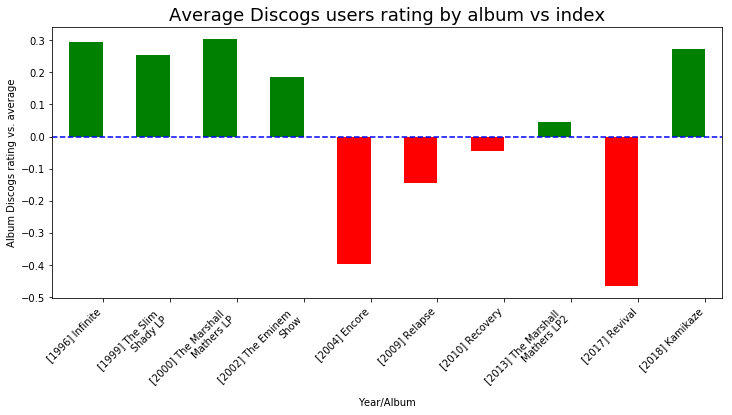

In [1]:
from functions.UI import UI
UI()

In [52]:
data2 = pd.read_csv('discog_store.csv')

In [54]:
data2 = data2[data2.ARTIST_NAME == 'Eminem']

In [56]:
data2.LYRICS_CLEAN_UNIQUE_COUNT.max()

521

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [10]:
data = pd.read_csv('discog_store.csv')

In [12]:
data.ARTIST_NAME.unique()

array(['Fontaines D.C.', 'Nirvana', 'Nick Cave & The Bad Seeds',
       'Justin Bieber', 'Eminem'], dtype=object)

In [13]:
data = data[data.ARTIST_NAME == 'Eminem']

In [17]:
data['charted_uncharted'] = data.BILLBOARD_TRACK_RANK.apply(lambda x: 'charted' if x > 0 else 'uncharted')

In [18]:
data.columns

Index(['ARTIST_ID', 'ARTIST_NAME', 'ALBUMS', 'YEAR', 'TRACK_TITLE',
       'DISCOG_PPL_HAVING', 'DISCOG_PPL_WANT', 'DISCOG_RATING',
       'DISCOG_AVG_RATING', 'EXCLUDE_ALBUM', 'EXCLUDE_SONG', 'GENIUS_LINK',
       'BILLBOARD_ALBUM_RANK', 'BILLBOARD_TRACK_RANK', 'BILLBOARD_TRACK_TITLE',
       'YEAR_ALBUM', 'YEAR_ALBUM_DISPLAY', 'LYRICS', 'SENTIMENT_PCT_NEGATIVE',
       'SENTIMENT_PCT_NEUTRAL', 'SENTIMENT_PCT_POSITIVE',
       'SENTIMENT_COMPOUND_SCORE', 'LYRICS_CLEAN', 'LYRICS_CLEAN_UNIQUE',
       'LYRICS_CLEAN_UNIQUE_COUNT', 'SENTIMENT_GROUP', 'charted_uncharted'],
      dtype='object')

In [31]:
data['SENTIMENT_GROUP'] = data.SENTIMENT_COMPOUND_SCORE.apply(
    lambda x: -1 if x <=-0.03 else (1 if x >=0.03 else 0)
)

In [32]:
data.head(2)

,ARTIST_ID,ARTIST_NAME,ALBUMS,YEAR,TRACK_TITLE,DISCOG_PPL_HAVING,DISCOG_PPL_WANT,DISCOG_RATING,DISCOG_AVG_RATING,EXCLUDE_ALBUM,...,LYRICS,SENTIMENT_PCT_NEGATIVE,SENTIMENT_PCT_NEUTRAL,SENTIMENT_PCT_POSITIVE,SENTIMENT_COMPOUND_SCORE,LYRICS_CLEAN,LYRICS_CLEAN_UNIQUE,LYRICS_CLEAN_UNIQUE_COUNT,SENTIMENT_GROUP,charted_uncharted
606,718441,Eminem,Infinite,1996,Infinite,2700,9823,523,4.3,False,...,"Aw, yeah (It's like this, like this)\nIt's Emi...",21.111111,65.555556,13.333333,-0.038371,aw yeah like like eminem baby back motherfucki...,"['murderin', 'disinfects', 'car', 'rather', 't...",264,-1,charted
607,718441,Eminem,Infinite,1996,Infinite [Credits],2700,9823,523,4.3,False,...,"1. ""Infinite""\n(M. Mathers, D. Porter)\n2. ""W....",3.703704,81.481481,14.814815,0.029393,1 infinite mathers porter 2 w e g interlude 3 ...,"['grant', 'phil', 'published', 'sounds', '4822...",88,0,uncharted


No handles with labels found to put in legend.


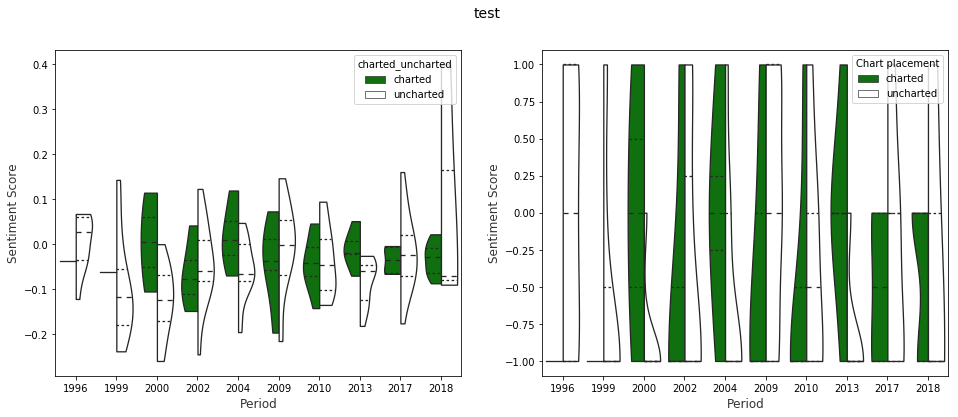

In [62]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.suptitle('test', fontsize=14)

# sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE",
#                data=data, inner="quart", linewidth=1.3,ax=ax1)
# ax1.set_xlabel("Period",size = 12,alpha=0.8)
# ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
sns.violinplot(x="YEAR", 
               y="SENTIMENT_COMPOUND_SCORE", 
               hue="charted_uncharted", 
               data=data, 
               split=True, 
               scale='width',
               inner="quart",
               cut = 0,
               linewidth=1.3,
               palette={"charted": "green", "uncharted": "white"}, ax=ax1)
ax1.set_xlabel("Period",size = 12,alpha=0.8)
ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Chart placement')


sns.violinplot(x="YEAR", y="SENTIMENT_GROUP", hue="charted_uncharted", 
               data=data, split=True, scale='width', cut = 0, 
               inner="quart", linewidth=1.3,
               palette={"charted": "green", "uncharted": "white"}, ax=ax2)
ax2.set_xlabel("Period",size = 12,alpha=0.8)
ax2.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Chart placement')

In [68]:
x = np.arange(1000)

In [70]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

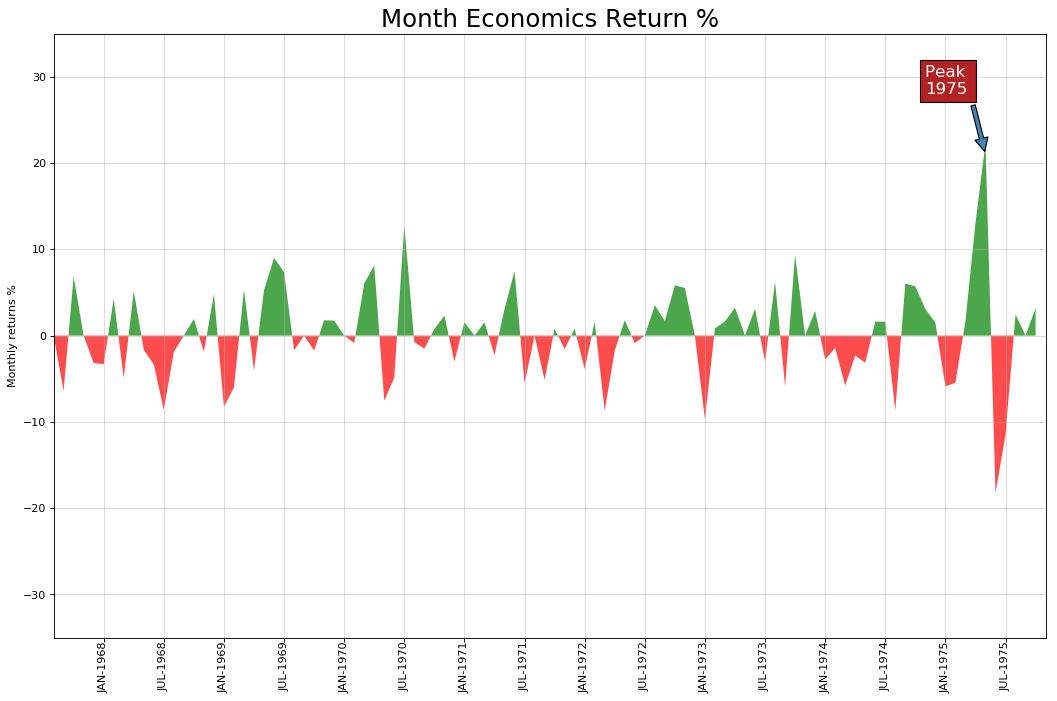

In [79]:
# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

In [71]:
df.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


In [72]:
y_returns


0      0.000000
1      0.000000
2     -6.400000
3      6.837607
4      0.000000
5     -3.200000
6     -3.305785
7      4.273504
8     -4.918033
9      5.172414
10    -1.639344
11    -3.333333
12    -8.620690
13    -1.886792
14     0.000000
15     1.923077
16    -1.886792
17     4.807692
18    -8.256881
19    -6.000000
20     5.319149
21    -4.040404
22     5.263158
23     9.000000
24     7.339450
25    -1.709402
26     0.000000
27    -1.739130
28     1.769912
29     1.739130
        ...    
70     0.000000
71     3.125000
72    -3.030303
73     6.250000
74    -5.882353
75     9.375000
76     0.000000
77     2.857143
78    -2.777778
79    -1.428571
80    -5.797101
81    -2.307692
82    -3.149606
83     1.626016
84     1.600000
85    -8.661417
86     6.034483
87     5.691057
88     3.076923
89     1.492537
90    -5.882353
91    -5.468750
92     1.652893
93    13.008130
94    22.302158
95   -18.235294
96   -11.510791
97     2.439024
98     0.000000
99     3.174603
Name: psavert, Length: 1

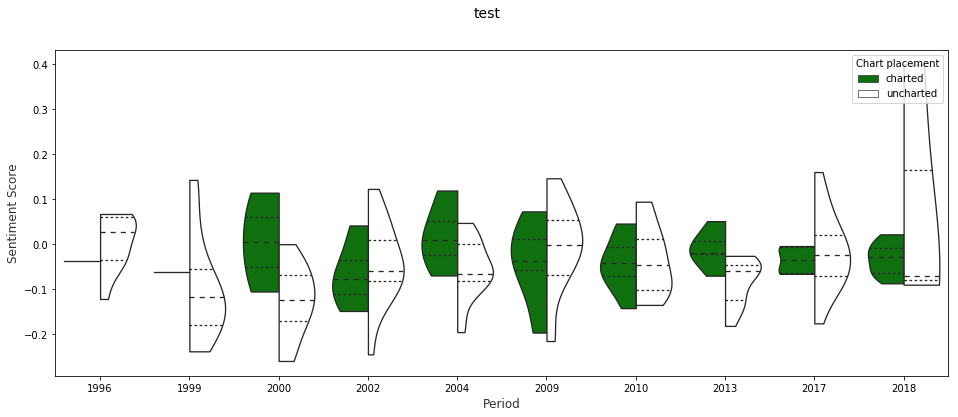

In [84]:
f, ( ax1) = plt.subplots(1, 1, figsize=(16, 6))
f.suptitle('test', fontsize=14)
x = data['YEAR']
y = data["SENTIMENT_COMPOUND_SCORE"]
sns.violinplot(x="YEAR", 
               y="SENTIMENT_COMPOUND_SCORE", 
               hue="charted_uncharted", 
               data=data, 
               split=True, 
               scale='width',
               inner="quart",
               cut = 0,
               linewidth=1.3,
               palette={"charted": "green", "uncharted": "white"}, ax=ax1)
# plt.fill_between(x[1:], y[1:], 0, where=y[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
# plt.fill_between(x[1:], y[1:], 0, where=y[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

ax1.set_xlabel("Period",size = 12,alpha=0.8)
ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Chart placement')





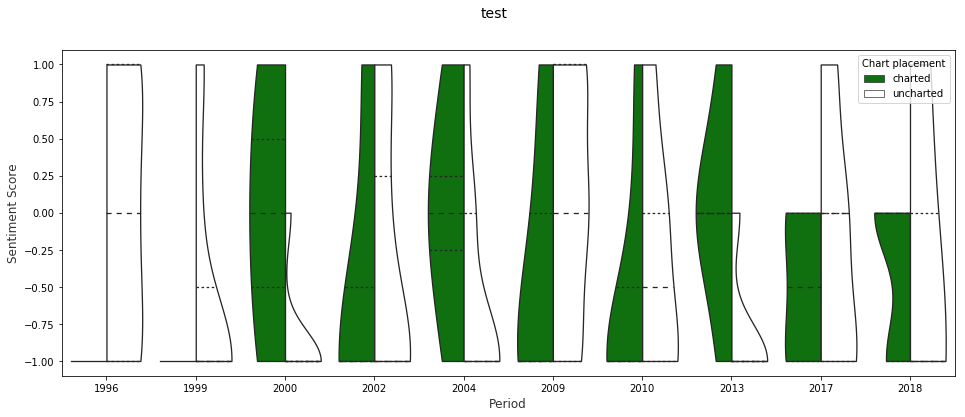

In [63]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, ( ax2) = plt.subplots(1, 1, figsize=(16, 6))
f.suptitle('test', fontsize=14)

# sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE",
#                data=data, inner="quart", linewidth=1.3,ax=ax1)
# ax1.set_xlabel("Period",size = 12,alpha=0.8)
# ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)



sns.violinplot(x="YEAR", y="SENTIMENT_GROUP", hue="charted_uncharted", 
               data=data, split=True, scale='width', cut = 0, 
               inner="quart", linewidth=1.3,
               palette={"charted": "green", "uncharted": "white"}, ax=ax2)
ax2.set_xlabel("Period",size = 12,alpha=0.8)
ax2.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Chart placement')

In [47]:
cols = ['YEAR', 'TRACK_TITLE', 'BILLBOARD_TRACK_RANK',
       'SENTIMENT_COMPOUND_SCORE', 'SENTIMENT_GROUP', 'charted_uncharted']
data = data[cols]

In [65]:
pd.pivot_table(data[data.YEAR == 200], 
               index = ['YEAR', 'charted_uncharted', 'SENTIMENT_GROUP'],
               values = 'TRACK_TITLE',
              aggfunc = 'count')

,,
YEAR,charted_uncharted,SENTIMENT_GROUP


In [42]:
data.SENTIMENT_COMPOUND_SCORE.max()

0.3991

In [43]:
data.SENTIMENT_COMPOUND_SCORE.min()

-0.2593648648648648

In [41]:
data.sort_values(by = 'SENTIMENT_COMPOUND_SCORE', ascending = False).head()

,ARTIST_ID,ARTIST_NAME,ALBUMS,YEAR,TRACK_TITLE,DISCOG_PPL_HAVING,DISCOG_PPL_WANT,DISCOG_RATING,DISCOG_AVG_RATING,EXCLUDE_ALBUM,...,LYRICS,SENTIMENT_PCT_NEGATIVE,SENTIMENT_PCT_NEUTRAL,SENTIMENT_PCT_POSITIVE,SENTIMENT_COMPOUND_SCORE,LYRICS_CLEAN,LYRICS_CLEAN_UNIQUE,LYRICS_CLEAN_UNIQUE_COUNT,SENTIMENT_GROUP,charted_uncharted
786,1416558,Eminem,Kamikaze,2018,Paul (Skit) by Paul Rosenberg,6055,2464,565,4.28,False,...,"Hey Em, It's Paul. Umm, I listened to the new ...",0.000000,0.000000,100.000000,0.399100,hey em paul umm listened new album umm really ...,"['like', '2', 'listened', 'working', 'slope', ...",33,1,uncharted
771,1283505,Eminem,Revival,2017,Remind Me,2625,1139,255,3.54,False,...,"Yo! I bust in, devilish grin, disgustin'\nAssh...",12.000000,48.000000,40.000000,0.160160,yo bust devilish grin disgustin asshole freckl...,"['ordered', 'grin', 'drinkin', 'snoop', 'ball'...",233,1,uncharted
713,100118,Eminem,Relapse,2009,Dr. West (Skit) (Ft. Dominic West),5978,3285,655,3.86,False,...,"""Morning, Marshall.""""Morning, doc.""""So we're d...",18.181818,27.272727,54.545455,0.146318,morning marshall morning doc discharging today...,"['shakes', 'boy', 'maybe', 'c', 'oh', 'already...",95,1,uncharted
624,12172,Eminem,The Slim Shady LP,1999,"Soap (Skit) (Ft. Jeff Bass & Royce da 5'9"")",19074,18265,2036,4.26,False,...,"Skylar Montgomery?\nWhat do you want from me, ...",16.666667,50.000000,33.333333,0.142792,skylar montgomery want roger know along messin...,"['never', 'veronica', 'met', 'messing', 'gonna...",23,1,uncharted
634,12172,Eminem,The Slim Shady LP,1999,Paul (Skit) [1999] (Ft. Paul Rosenberg),19074,18265,2036,4.26,False,...,"Em, what's going on?\nThis is Paul Rosenberg, ...",0.000000,71.428571,28.571429,0.135857,em going paul rosenberg faithful attorney law ...,"['going', 'faithful', 'listened', 'tone', 'giv...",23,1,uncharted


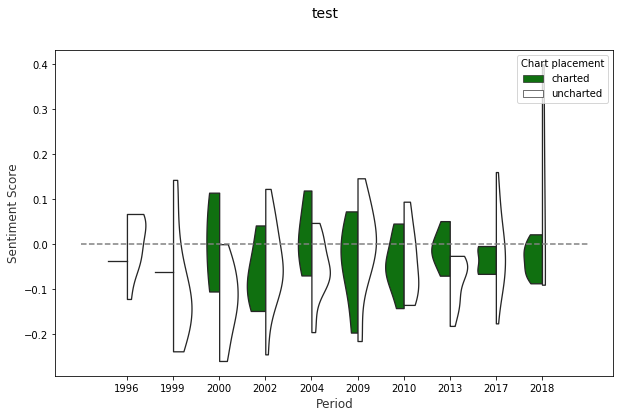

In [91]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, ( ax2) = plt.subplots(1, 1, figsize=(10, 6))
f.suptitle('test', fontsize=14)

# sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE",
#                data=data, inner="quart", linewidth=1.3,ax=ax1)
# ax1.set_xlabel("Period",size = 12,alpha=0.8)
# ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)

sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE", hue="charted_uncharted", 
               data=data, split=True, 
               inner=None, 
               linewidth=1.3, cut = 0,
               palette={"charted": "green", "uncharted": "white"}, ax=ax2)
ax2.set_xlabel("Period",size = 12,alpha=0.8)
ax2.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
ax2.plot([-1, len(data.YEAR.unique())], [0, 0], "k--", color = 'grey')
l = plt.legend(loc='upper right', title='Chart placement')